In [1273]:
from random import *  

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

Code_genetique = ['A','B','C']

Dominant = {'C':[('A','recessif'),('B','recessif'),('C','dominant')],'A':[('A','dominant'),('B','neutre'),('C','dominant')],'B':[('B','dominant'),('A','neutre'),('C','dominant')]}

def population_initiale(Code_genetique,Esperence_vie,nb):
    
    pop=[]
    for i in range(nb):
        pop.append([randint(0,Esperence_vie),choice(Code_genetique),choice(Code_genetique)])
    
    return pop
    
pop=population_initiale(Code_genetique,10,20)
population_initiale(Code_genetique,10,20)

[[5, 'B', 'B'],
 [5, 'A', 'A'],
 [9, 'C', 'B'],
 [1, 'A', 'B'],
 [4, 'B', 'A'],
 [9, 'C', 'C'],
 [3, 'B', 'B'],
 [5, 'C', 'C'],
 [2, 'C', 'A'],
 [10, 'C', 'C'],
 [7, 'C', 'B'],
 [10, 'C', 'C'],
 [1, 'B', 'C'],
 [0, 'A', 'A'],
 [7, 'B', 'C'],
 [5, 'A', 'B'],
 [3, 'C', 'A'],
 [7, 'B', 'C'],
 [5, 'A', 'C'],
 [2, 'A', 'A']]

In [1274]:
individu=[7, 'A', 'A']

def dominants(individu,Dominant):
    allele1=individu[1]
    allele2=individu[2]
    for i in Dominant[allele1]:
        allele,prio=i
        if allele==allele2:
            if prio=='dominant':
                return allele1
            elif prio=='recessif':
                return allele2
            else:
                if allele1==allele2:
                    return allele1
                elif allele1<allele2:
                    return allele1 + allele2
                else : 
                    return allele2 + allele1

#dominants(individu,Dominant)

In [1275]:
p_gene = {'A':0.1,'B':0.2,'C':0.1,'AB':0.1}
p_age = {0:0.5,1:0.3,2:0.2,3:0.3,4:0.4,5:0.5,6:0.6,7:0.7,8:0.8,9:1,10:2}

def survie(p_gene,p_age,pop):
    i=0
    while i<len(pop):
        age=pop[i][0]
        gene=dominants(pop[i],Dominant)
        if (p_age[age]+p_gene[gene])/2>random():
            del pop[i]
        else:
            i=i+1
    return pop

#survie(p_gene,p_age,pop)

In [1276]:
def caracteristque_enfant(ind1,ind2):
    if randint(0,100)==27:
        mutation(Code_genetique,Dominant)
        return[0,choice(ind1[1:3]),Code_genetique[-1]]
    return[0,choice(ind1[1:3]),choice(ind1[1:3])]

In [1277]:
p_descendant = {0 : 0.08,
     1 : 0.02,
     2 : 0.1,
     3 : 0.2,
     4 : 0.3,
     5 : 0.3}

def nombre_de_descendant(p):
    j=random()
    k=0
    
    for i in p_descendant.keys():
        k+=p_descendant[i]
        if j <= k:
            return i
#nombre_de_descendant(p_descendant)


In [1278]:
def new_pop(pop):
    pop=survie(p_gene,p_age,pop)
    new_pop=[]
    i=0
    while i<len(pop):
        if pop[i][0]<=2:
            new_pop.append(pop[i])
            del pop[i]
        else:
            i=i+1
            
    while len(pop)>2:
        a=0
        b=0
        while a==b:
            a=randint(0,len(pop)-1)
            b=randint(0,len(pop)-1)
        for j in range(nombre_de_descendant(p_descendant)):
            new_pop.append(caracteristque_enfant(pop[a],pop[b]))
        new_pop.append(pop[a])
        new_pop.append(pop[b])
        del pop[a]
        if a<b:
            del pop[b-1]
        else:
            del pop[b]
    
    return new_pop

In [1279]:
def change_allele_p(p_gene):
    if randint(0,50)==10:
        for i in p_gene:
            p_gene[i] += uniform(-0.1,0.1)
    if randint(0,200)==92:
        for i in p_gene:
            p_gene[i] += uniform(-0.3,0.3)
    if randint(0,1000)==10:
        for i in p_gene:
            p_gene[i] = random()
    return p_gene
            
    
#change_allele_p(p_gene)   
    

In [1280]:
def mutation(Code_genetique,Dominant):
    Code_genetique.append(chr(ord(Code_genetique[-1])+1))
    for i in Code_genetique:
        if i not in Dominant:
            L1=[]
            for j in Code_genetique:
                L1.append((j,choice(['dominant','recessif','neutre'])))
            Dominant[i]=L1
    for k in Code_genetique[0:-1]:
        for l in Dominant[i]:
            a,temp=l
            if a==k:
                if temp=='neutre':
                    Dominant[k].append((Code_genetique[-1],'neutre'))
                elif temp=='recessif':
                    Dominant[k].append((Code_genetique[-1],'dominant'))
                else:
                    Dominant[k].append((Code_genetique[-1],'recessif'))
    
    new_probabilite(Dominant,p_gene,Code_genetique)
    return Dominant
                    
#mutation(Code_genetique,Dominant)


        

In [1281]:
def new_probabilite(Dominant,p_gene,Code_genetique):
    for i in Code_genetique:
        p_gene[dominants([5,i,Code_genetique[-1]],Dominant)]=random()
    
    return p_gene




In [1282]:
def nombre_genes(pop,i,Di):
    for a in Di:
            Di[a].append(0)
    for j in pop:
        if dominants(j,Dominant) in Di:
            Di[dominants(j,Dominant)][-1]= Di[dominants(j,Dominant)][-1]+1
            
        else:
            Di[dominants(j,Dominant)]= []
            for k in range(i):
                Di[dominants(j,Dominant)].append(0)
            Di[dominants(j,Dominant)].append(1)
    return Di

#nombre_genes(pop,0,Di)

In [1283]:
def new_pop_ans(n,pop):
    Di=dict()
    pop_max=0
    for i in range(n):
        pop=new_pop(pop)
        for j in pop:
            j[0]=j[0]+1
        nombre_genes(pop,i,Di)
        change_allele_p(p_gene)
        if len(pop)>pop_max:
            pop_max=len(pop)
            
    return (pop,Di,pop_max)

#new_pop_ans(20,pop)

In [1284]:
#pop,Di=new_pop_ans(20,pop)

#plt.plot([2,5,6,9],[50,20,30,48])
#plt.plot([i for i in range (len(Di['A']))],Di['A'])
#plt.axis([0,20,0,100])
#plt.show()

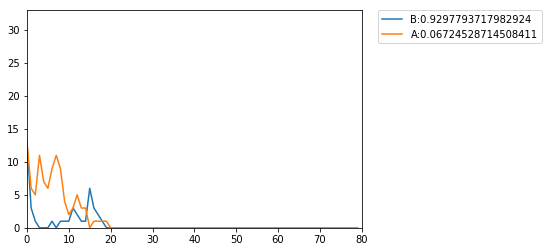

In [1285]:
pop,Di,pop_max=new_pop_ans(80,pop)

#plt.plot([2,5,6,9],[50,20,30,48])
for i in Di:
    b=False
    for a in Di[i]:
        if a>10:
            b=True
    if b:
        plt.plot([j for j in range (len(Di[i]))],Di[i],label=i+':'+str(p_gene[i]))
plt.axis([0,80,0,pop_max])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()